In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xar
import dask 
import pandas as pd
import xrft 
import seawater as sw
from scipy.interpolate import griddata
from matplotlib import ticker

import os.path as op

from dask.diagnostics import ProgressBar


In [2]:
xday=-1

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
varf=xar.open_dataset(listm[-9:][xday])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
vart=xar.open_dataset(listt[xday])


In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
# print(np.array(varf.nav_lat[0,0]-varf.nav_lat[-1,0]))
# np.nanmean(np.diff(varf.nav_lat[:,0]))*111

print(np.diff(varf.nav_lat[:,0]).max()*111e3)
print(np.diff(varf.nav_lat[:,0]).min()*111e3)


# print(np.diff(varf.nav_lon[:,0]).max()
# print(np.diff(varf.nav_lon[:,0]).min())



print(1/3000)

#fft maximum wiould be twice as the observation

#grid 700m >> 2*700
#CHECAR PRA LONGITUDE, NAO USAF o 111km 

1738.1858825683594
1697.5364685058594
0.0003333333333333333


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


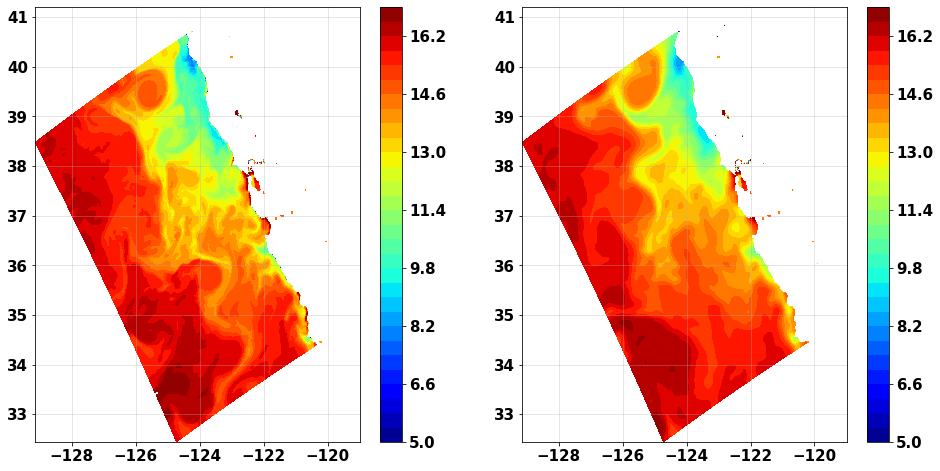

In [6]:
af=varf.SST[xday]

at=vart.SST[xday]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.contourf(varf.nav_lon,varf.nav_lat,af-273.15,levels=np.linspace(5,17,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(varf.nav_lon,varf.nav_lat,at-273.15,levels=np.linspace(5,17,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()




In [8]:
af


<xarray.DataArray 'SST' (y: 390, x: 300)>
array([[288.9967 , 288.99286, 288.98672, ...,   0.     ,   0.     ,   0.     ],
       [288.99673, 288.9967 , 288.99286, ...,   0.     ,   0.     ,   0.     ],
       [288.99677, 288.99677, 288.9967 , ...,   0.     ,   0.     ,   0.     ],
       ...,
       [289.28714, 289.28677, 289.28787, ...,   0.     ,   0.     ,   0.     ],
       [289.28677, 289.28787, 289.28787, ...,   0.     ,   0.     ,   0.     ],
       [289.28787, 289.28787, 289.28787, ...,   0.     ,   0.     ,   0.     ]],
      dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  datetime64[ns] ...
    time_counter   datetime64[ns] 2012-07-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           SEA SURFACE TEMPERATURE
    units:               K
    online_operation:    average
    interval_operation:  12 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 12 s)

In [9]:
full_ps = xrft.power_spectrum(af.drop(['nav_lat', 'nav_lon']),dim=["x", "y"])
smth_ps = xrft.power_spectrum(at.drop(['nav_lat', 'nav_lon']),dim=["x", "y"])


iso_f = xrft.isotropic_power_spectrum(af.drop(['nav_lat', 'nav_lon']), dim=['x','y'],detrend='constant')
iso_t = xrft.isotropic_power_spectrum(at.drop(['nav_lat', 'nav_lon']), dim=['x','y'],detrend='constant')


fy=smth_ps.freq_y
fx=smth_ps.freq_x

fx,fy=np.meshgrid(fx,fy)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


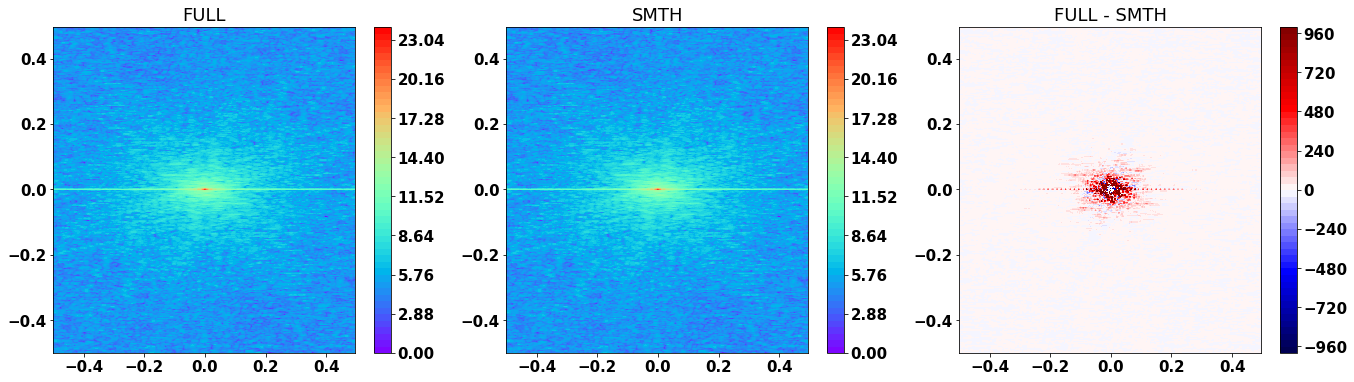

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


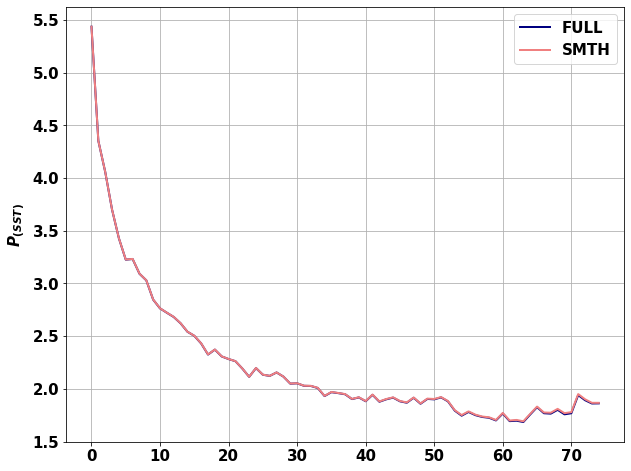

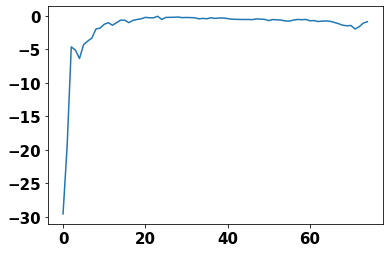

In [10]:

plt.figure(figsize=(23,6))
plt.subplot(1,3,1)
plt.contourf(fx,fy,np.log(full_ps),levels=np.linspace(0,24,51),cmap='rainbow')
plt.colorbar()
plt.title('FULL')

plt.subplot(1,3,2)
plt.contourf(fx,fy,np.log(smth_ps),levels=np.linspace(0,24,51),cmap='rainbow')
plt.colorbar()
plt.title('SMTH')

plt.subplot(1,3,3)
plt.contourf(fx,fy,full_ps-smth_ps,levels=np.linspace(-1000,1000,51),cmap='seismic')
plt.colorbar()
plt.title('FULL - SMTH')



plt.figure(figsize=(10,8))
plt.plot(np.log10(iso_f),label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(iso_t),label='SMTH',linewidth=2,color='lightcoral')
plt.ylabel(r'$P_{(SST)}$')
# plt.xlabel(r'$\lambda$ [km]')
plt.legend()
plt.grid()


plt.figure()
plt.plot(iso_f-iso_t)

# plt.figure(figsize=(10,8))
# plt.plot(1/iso_f.freq_r,iso_f,norm='logNorm()',label='FULL',linewidth=2,color='navy')
# plt.plot(np.log(1/iso_f.freq_r),np.log(iso_t),label='SMTH',linewidth=2,color='lightcoral')
# plt.ylabel(r'$P_{(SST)}$')
# # plt.xlabel(r'$\lambda$ [km]')
# plt.legend()
# plt.grid()
# plt.ylim(3,5)








/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:532: FutureWarning: Flags true_phase and true_amplitude will be set to True in future versions of xrft.idft to preserve the theoretical phasing and amplitude of Inverse Fourier Transform. Consider using xrft.ifft to ensure future compatibility with numpy.ifft like behavior and to deactivate this warning.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:556: FutureWarning: Default idft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/homes/metogra/iufarias/.local/lib/python3.8/site-packages/xarray/core/common.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self.values, dtype=dtype)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:532: FutureWarning: Flags true_phase and true_amplitud

Text(0.5, 1.0, 'SMTH')

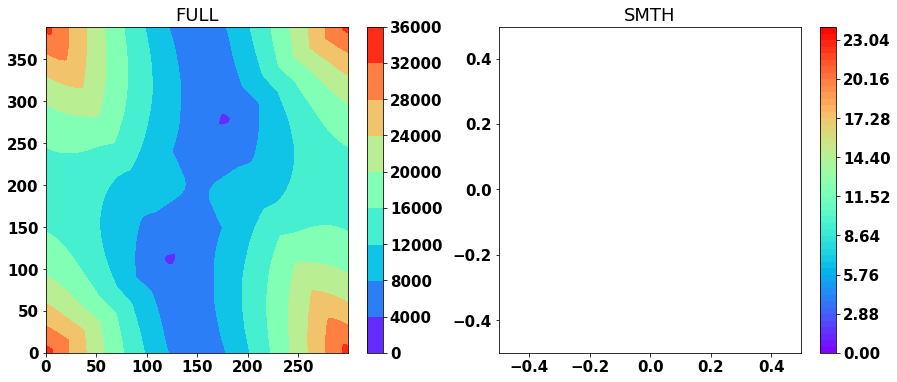

In [49]:

plt.figure(figsize=(23,6))
plt.subplot(1,3,1)
plt.contourf(xrft.ifft(full_ps),cmap='rainbow')
plt.colorbar()
plt.title('FULL')

plt.subplot(1,3,2)
plt.contourf(fx,fy,xrft.ifft(smth_ps),levels=np.linspace(0,24,51),cmap='rainbow')
plt.colorbar()
plt.title('SMTH')

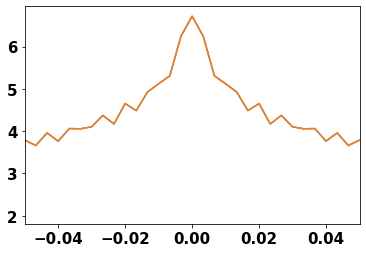

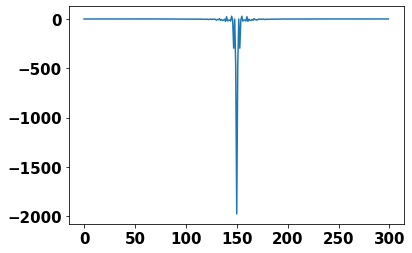

In [40]:
plt.figure()
plt.plot(full_ps.freq_x,np.log10(np.nanmean(full_ps,axis=0)))
plt.plot(smth_ps.freq_x,np.log10(np.nanmean(smth_ps,axis=0)))
plt.xlim(-0.05,0.05)


plt.figure()
plt.plot(full_ps.mean(axis=0)-smth_ps.mean(axis=0))